In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data=pd.read_csv('covid_19_india1.csv')
data

,Sno,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,Kerala,1,0,0,0,1
1,2,Kerala,1,0,0,0,1
2,3,Kerala,2,0,0,0,2
3,4,Kerala,3,0,0,0,3
4,5,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...
18105,18106,Telangana,-,-,638410,3831,650353
18106,18107,Tripura,-,-,77811,773,80660
18107,18108,Uttarakhand,-,-,334650,7368,342462
18108,18109,Uttar Pradesh,-,-,1685492,22775,1708812


In [26]:
data.isna().sum()

Sno                         0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [27]:
data.head()

,Sno,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,Kerala,1,0,0,0,1
1,2,Kerala,1,0,0,0,1
2,3,Kerala,2,0,0,0,2
3,4,Kerala,3,0,0,0,3
4,5,Kerala,3,0,0,0,3


In [29]:
data.shape

(18110, 7)

<Axes: xlabel='State/UnionTerritory', ylabel='count'>

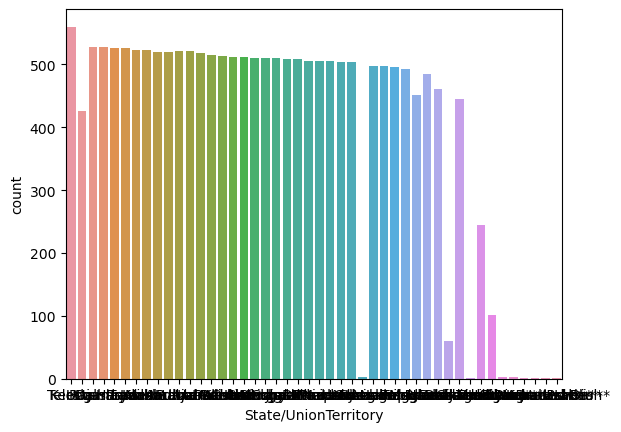

In [34]:
sns.countplot(data,x='State/UnionTerritory')

In [35]:
data.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [36]:
data.corr()

C:\Users\Naveen\AppData\Local\Temp\ipykernel_18496\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sno,Cured,Deaths,Confirmed
Sno,1.000000,0.408482,0.301742,0.403012
Cured,0.408482,1.000000,0.917529,0.997751
Deaths,0.301742,0.917529,1.000000,0.918346
Confirmed,0.403012,0.997751,0.918346,1.000000


C:\Users\Naveen\AppData\Local\Temp\ipykernel_18496\3714624511.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)


<Axes: >

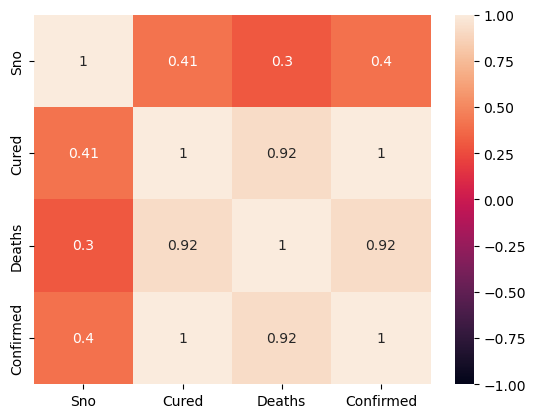

In [37]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)

In [38]:
data.columns

Index(['Sno', 'State/UnionTerritory', 'ConfirmedIndianNational',
       'ConfirmedForeignNational', 'Cured', 'Deaths', 'Confirmed'],
      dtype='object')

Skew:  0.5674050307810211

Kurthosis:  -0.0540033760910168


C:\Users\Naveen\AppData\Local\Temp\ipykernel_18496\2205161136.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

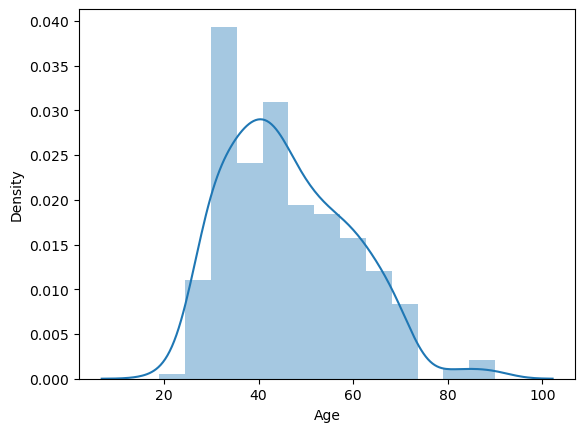

In [12]:
from scipy.stats import skew, kurtosis
print('Skew: ',data[ 'Age'].skew())
print()
print('Kurthosis: ',data['Age'].kurtosis())
sns.distplot (data['Age'])

# Build a Naive Baise Model

In [39]:
data.head(2)

,Sno,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,Kerala,1,0,0,0,1
1,2,Kerala,1,0,0,0,1


In [47]:
x=data.iloc[:,:-1].values

In [48]:
y=data.iloc[:,-1:]

In [49]:
from sklearn.model_selection import train_test_split

xtrain, xtest,ytrain, ytest=train_test_split(x,y,test_size=.25, random_state=2)

In [50]:
xtrain.shape

(13582, 6)

In [51]:
ytrain.shape

(13582, 1)

In [52]:
from sklearn.naive_bayes import GaussianNB
gauss_nb=GaussianNB()
gauss_nb.fit(xtrain, ytrain)
print('Training completed....')
print()
ypred=gauss_nb.predict(xtest)
print("Testing is done")

#cost
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("="*80)
print("Accuracy score:\n",accuracy_score (ytest,ypred))
print()
print("="*80)
print()
print("Confusion Matrix:\n", confusion_matrix(ytest,ypred))
print("="*80)
print()
print('Classification Matrix : \n',classification_report (ytest, ypred))
print("="*80)

C:\Users\Naveen\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: could not convert string to float: 'Haryana'